## LAB № 06

Для закрепленного за Вами варианта лабораторной работы:

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

In [2]:
#######
target = 39
name = 'bands.data'
random_state =1 

df = pd.read_csv(f"../data/{name}",
                 delimiter=",", header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,19910108,X126,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,X266,TVGUIDE,25503,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,B7,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,J34,KMART,37351,NO,KEY,YES,BENTON,GALLATIN,UNCOATED,...,42.5,5,0,2.3,0.6,35,40,106.67,100,noband


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если в признаках пропущенных значений нет, то удалите из набора данных записи, идентифицированные как выбросы при помощи метода кластеризации DBSCAN.

In [3]:
df = df.dropna(subset=[target])

In [4]:
df = df.replace('?', np.NaN)
print('Число записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))
print('Число пропущенных значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Число записей = 539
Число признаков = 40
Число пропущенных значений:
	0: 0
	1: 0
	2: 0
	3: 0
	4: 48
	5: 0
	6: 56
	7: 59
	8: 0
	9: 0
	10: 0
	11: 24
	12: 54
	13: 18
	14: 0
	15: 0
	16: 0
	17: 3
	18: 155
	19: 18
	20: 54
	21: 5
	22: 27
	23: 2
	24: 1
	25: 30
	26: 63
	27: 55
	28: 10
	29: 55
	30: 55
	31: 56
	32: 54
	33: 6
	34: 7
	35: 54
	36: 7
	37: 7
	38: 3
	39: 0


In [5]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [6]:
###########
df = df.groupby(target).apply(lambda group: group.fillna(group.mean()))


In [7]:
df = df.dropna(axis=1, how='all')

df.isna().sum().sum()

0

In [8]:
print(df.shape)
dbscan = DBSCAN(eps=100)
labels = dbscan.fit_predict(df)
df_new = df[labels != -1]
print(df_new.shape)

(539, 40)
(522, 40)


In [9]:
df = df_new.copy()

3. Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных не более четырех признаков.

In [10]:
X = df.drop([target], axis=1)
y = df[target].astype(int)

In [11]:
variance = X.var()
variance_top_features = X.columns[variance.argsort()[-4:]]
X = X[variance_top_features]

4. Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.fit_transform(X)

5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

In [13]:
X = pd.DataFrame(X)

In [14]:
variance = X.var()
variance_top_features = X.columns[variance.argsort()[-3:]]
X_3d = X[variance_top_features]

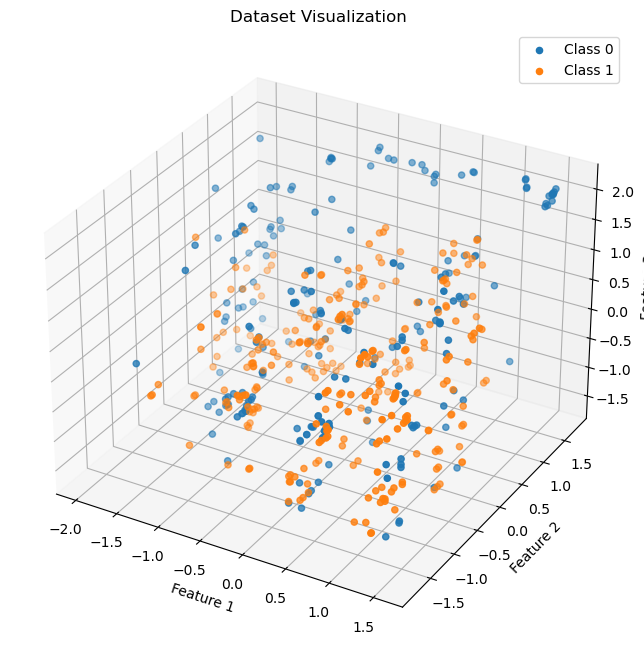

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X_3d = X_3d.values
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

cmap = plt.cm.get_cmap('viridis', len(np.unique(y)))
for class_label in np.unique(y):
    ax.scatter(X_3d[y == class_label, 0], X_3d[y == class_label, 1], X_3d[y == class_label, 2], 
               label=f'Class {class_label}', cmap=cmap)

ax.set_title('Dataset Visualization')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.legend()
plt.show()

6. Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 4, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности.

In [16]:
variance = X.var()
variance_top_features = X.columns[variance.argsort()[-2:]]
X_2d = X[variance_top_features]

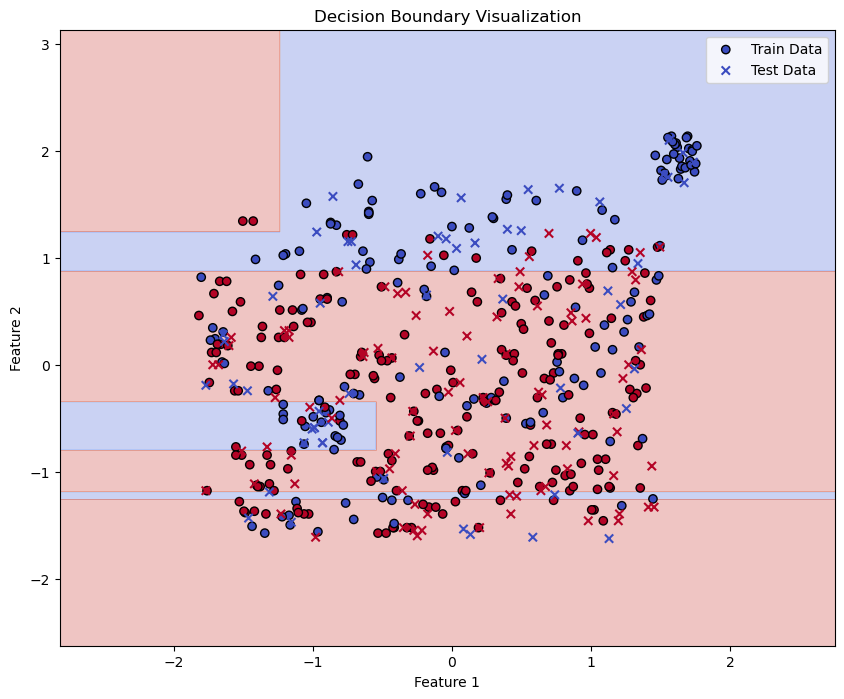

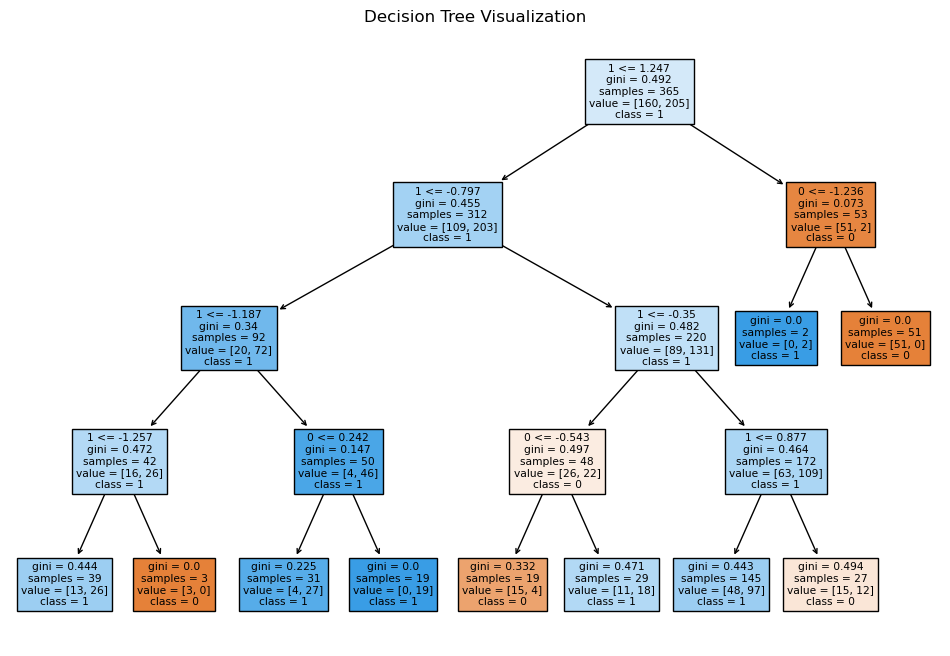

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X_2d = X_2d.values

X_train, X_test, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=random_state)

dt_classifier = DecisionTreeClassifier(max_depth=4, random_state=random_state)
dt_classifier.fit(X_train, y_train)

accuracy = dt_classifier.score(X_test, y_test)

x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = dt_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm, label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', cmap=plt.cm.coolwarm, label='Test Data')
plt.title('Decision Boundary Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=pd.DataFrame(X_2d).columns, class_names=np.unique(y).astype(str))
plt.title('Decision Tree Visualization')
plt.show()

7. Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании. 

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

In [19]:
clf2 = LogisticRegression()
clf2.fit(X_train, y_train)

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('log_reg', LogisticRegression())
    ])
model1 = PolynomialLogisticRegression(degree=3)
model1.fit(X_train, y_train)

model2 = SVC()
model2.fit(X_train, y_train)

SVC()

In [20]:
base_estimators = [
    ('model1', model1),
    ('model2', model2),
]

In [21]:
model3 = VotingClassifier(estimators=base_estimators, voting='hard')
model3.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              Pipeline(steps=[('poly',
                                               PolynomialFeatures(degree=3)),
                                              ('log_reg',
                                               LogisticRegression())])),
                             ('model2', SVC())])

In [22]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, jaccard_score, precision_score

score = precision_score

In [23]:
print("Model1 score", score(y_test, model1.predict(X_test)))
print("Model2 score", score(y_test, model2.predict(X_test)))
print("Combo model score", score(y_test, model3.predict(X_test)))

Model1 score 0.7857142857142857
Model2 score 0.7398373983739838
Combo model score 0.7916666666666666


8. Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании. 

In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

model4 = RandomForestClassifier()
model4.fit(X_train, y_train)

model5 = GradientBoostingClassifier()
model5.fit(X_train, y_train)

y_pred_1 = model4.predict(X_test)
y_pred_2 = model5.predict(X_test)

In [25]:
print("Model4", score(y_test, y_pred_1))
print("Model5", score(y_test, y_pred_2))

Model4 0.8055555555555556
Model5 0.819047619047619


9. Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок. 

In [26]:
from mlxtend.plotting import plot_decision_regions

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=random_state)

Text(0, 0.5, 'Feature2')

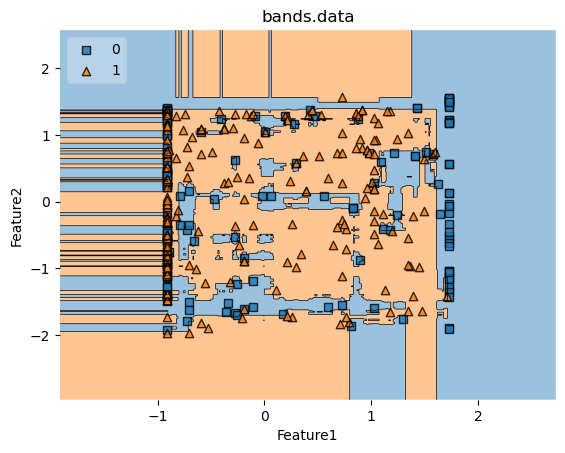

In [28]:
plot_decision_regions(X_train[:,:2], y_train, clf=model4.fit(X_train[:,:2], y_train), legend=2, zoom_factor=1)
plt.title(name)
plt.xlabel('Feature1')
plt.ylabel('Feature2')

Text(0, 0.5, 'Feature2')

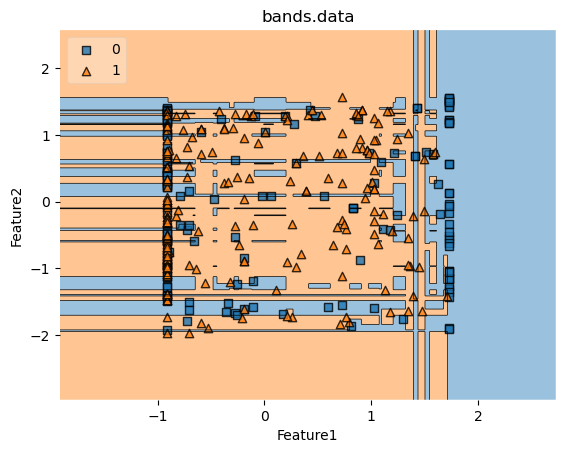

In [29]:
plot_decision_regions(X_train[:,:2], y_train, clf=model5.fit(X_train[:,:2], y_train), legend=2, zoom_factor=1)
plt.title(name)
plt.xlabel('Feature1')
plt.ylabel('Feature2')